In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [2]:
count = 0
dirs = os.listdir('images/')
for dir in dirs:
    files = list(os.listdir('images/' +dir))
    print(dir +' Folder has '+ str(len(files))+ 'images')
    count = count + len(files)
print( 'images Folder has '+ str(count)+ 'images')

bacterial_leaf_blight Folder has 707images
brown_spot Folder has 550images
healthy Folder has 350images
leaf_blast Folder has 1153images
leaf_scald Folder has 351images
narrow_brown_spot Folder has 350images
non_paddy_leaf Folder has 2157images
images Folder has 5618images


In [3]:
#load images into arrays as dataset
import tensorflow as tf
base_dir = 'images/'
img_size = 180
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 5619 files belonging to 7 classes.
Using 4496 files for training.
Found 5619 files belonging to 7 classes.
Using 1123 files for validation.


In [5]:
paddyleaf_names = train_ds.class_names
paddyleaf_names

['bacterial_leaf_blight',
 'brown_spot',
 'healthy',
 'leaf_blast',
 'leaf_scald',
 'narrow_brown_spot',
 'non_paddy_leaf']

In [6]:
import matplotlib.pyplot as plt

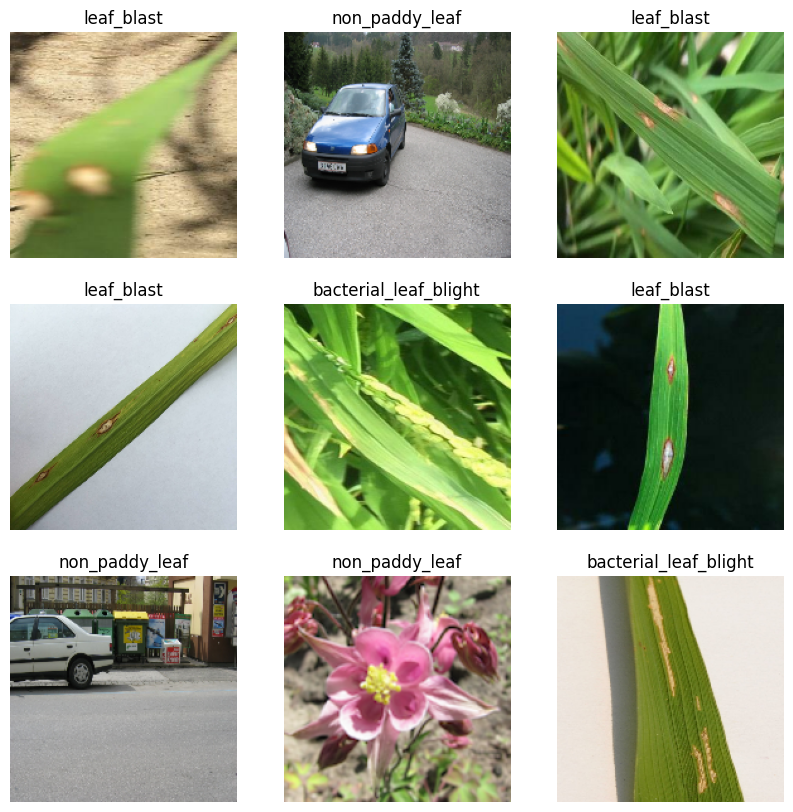

In [9]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(paddyleaf_names[labels[i]])
        plt.axis('off')

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [12]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [14]:
#data augmentation
from tensorflow.keras.models import Sequential
data_augmentation = Sequential([
    
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


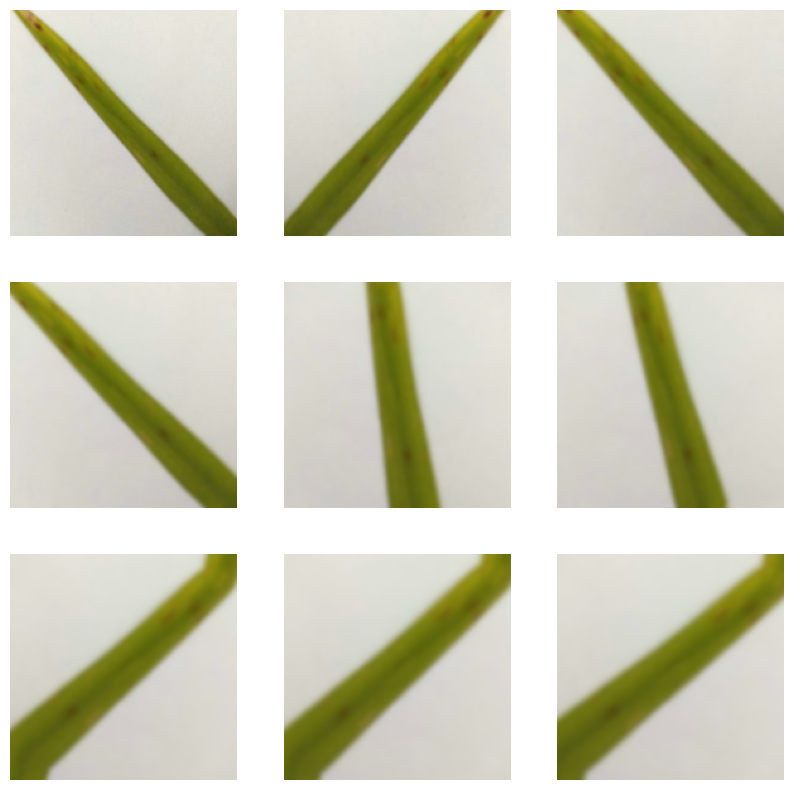

In [15]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [16]:
#model creation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,543 (15.22 MB)

 Trainable params: 3,989,543 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 65s 437ms/step - accuracy: 0.4862 - loss: 1.3641 - val_accuracy: 0.7596 - val_loss: 0.6702
Epoch 2/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 58s 412ms/step - accuracy: 0.7394 - loss: 0.7082 - val_accuracy: 0.7649 - val_loss: 0.6510
Epoch 3/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 60s 422ms/step - accuracy: 0.7841 - loss: 0.5798 - val_accuracy: 0.8593 - val_loss: 0.4114
Epoch 4/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 57s 407ms/step - accuracy: 0.8244 - loss: 0.4934 - val_accuracy: 0.8593 - val_loss: 0.4024
Epoch 5/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 58s 413ms/step - accuracy: 0.8433 - loss: 0.4447 - val_accuracy: 0.8388 - val_loss: 0.4864
Epoch 6/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 51s 359ms/step - accuracy: 0.8498 - loss: 0.4205 - val_accuracy: 0.8718 - val_loss: 0.3746
Epoch 7/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 53s 377ms/step - accuracy: 0.8726 - loss: 0.3323 - val_accuracy: 0.8362 - val_loss: 0.4374
Epoch 8/15
141/141 ━━━━━━━━━━━━━━━━━━━━ 55s 392ms/step - accuracy: 0.8864 - loss: 0

In [20]:
from PIL import Image
import numpy as np
import tensorflow as tf

def classify_image(image_path):
    """
    Classify an image into one of the classes from paddyleaf_names using the provided model.

    Parameters:
    - image_path (str): Path to the input image.
    - model (tensorflow.keras.Model): The trained model to make predictions.
    - paddyleaf_names (list): List of class names corresponding to model output.

    Returns:
    - str: Predicted class name and its prediction score.
    """

    # Load and preprocess the image
    input_image = Image.open(image_path).resize((180, 180))  # Resize manually
    input_image_array = np.array(input_image)
    input_image_exp_dim = np.expand_dims(input_image_array, axis=0)  # Add batch dimension

    # Predict with the model
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])

    # Get the predicted class
    predicted_class = paddyleaf_names[np.argmax(result)]
    prediction_score = np.max(result) * 100  # Confidence score

    # Return the result as a string
    return f"The image belongs to '{predicted_class}' with a score of {prediction_score:.2f}%"

# Example usage:
# image_path = 'sample/paddy01.jpg'
# result = classify_image(image_path, model, paddyleaf_names)
# print(result)


In [21]:
classify_image('sample/paddy01.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 85.13%"

In [22]:
classify_image('sample/paddy02.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


"The image belongs to 'leaf_blast' with a score of 99.98%"

In [23]:
model.save('paddyleaf_model.h5')

In [24]:
classify_image('sample/paddy06.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


"The image belongs to 'brown_spot' with a score of 80.84%"

In [25]:
classify_image('sample/paddy04.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 78.62%"

In [26]:
classify_image('sample/paddy05.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


"The image belongs to 'non_paddy_leaf' with a score of 94.57%"

In [27]:
classify_image('images/healthy/healthy (3).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'healthy' with a score of 74.36%"

In [28]:
classify_image('images/healthy/healthy (1).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


"The image belongs to 'healthy' with a score of 60.26%"

In [29]:
classify_image('images/healthy/healthy (5).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'healthy' with a score of 69.11%"

In [30]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (1).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.99%"

In [31]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (2).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 100.00%"

In [32]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (3).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 100.00%"

In [33]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (4).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.97%"

In [34]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (5).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.99%"

In [35]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (4).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.97%"

In [36]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (6).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.98%"

In [37]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (7).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.94%"

In [38]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (8).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.98%"

In [39]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (9).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 100.00%"

In [40]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (10).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 98.22%"

In [41]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (11).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 100.00%"

In [42]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (12).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 100.00%"

In [43]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (13).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 100.00%"

In [44]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (14).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 100.00%"

In [45]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (15).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.99%"

In [46]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (17).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 100.00%"

In [47]:
classify_image('validation/bacterial_leaf_blight/bacterial_val (18).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 100.00%"

In [48]:
classify_image('images/bacterial_leaf_blight/bacterial_leaf_blight (38).JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.97%"

In [49]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_160.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.34%"

In [50]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_161.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 98.77%"

In [51]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_162.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.66%"

In [52]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_167.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 98.95%"

In [53]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_170.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.81%"

In [54]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_173.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.89%"

In [55]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_175.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.91%"

In [56]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_180.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.81%"

In [57]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_185.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.76%"

In [58]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_189.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.74%"

In [59]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_191.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 97.24%"

In [60]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_198.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 51.73%"

In [61]:
classify_image('images/bacterial_leaf_blight/BACTERAILBLIGHT4_200.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 99.03%"

In [62]:
classify_image('images/brown_spot/BROWNSPOT7_015.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'brown_spot' with a score of 70.59%"

In [63]:
classify_image('images/brown_spot/BROWNSPOT7_016.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'brown_spot' with a score of 99.76%"

In [64]:
classify_image('images/brown_spot/BROWNSPOT7_010.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


"The image belongs to 'brown_spot' with a score of 48.82%"

In [65]:
classify_image('images/brown_spot/BROWNSPOT7_019.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


"The image belongs to 'brown_spot' with a score of 99.70%"

In [66]:
classify_image('images/brown_spot/BROWNSPOT7_025.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


"The image belongs to 'brown_spot' with a score of 99.85%"

In [67]:
classify_image('images/brown_spot/BROWNSPOT7_023.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


"The image belongs to 'brown_spot' with a score of 92.75%"

In [68]:
classify_image('images/brown_spot/BROWNSPOT7_115.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


"The image belongs to 'brown_spot' with a score of 98.71%"

In [69]:
classify_image('images/brown_spot/BROWNSPOT7_113.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 95.50%"

In [70]:
classify_image('images/brown_spot/BROWNSPOT7_125.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'brown_spot' with a score of 87.09%"

In [71]:
classify_image('images/healthy/healthy (156).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'healthy' with a score of 90.02%"

In [72]:
classify_image('images/healthy/healthy (159).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


"The image belongs to 'healthy' with a score of 96.36%"

In [73]:
classify_image('images/healthy/healthy (56).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


"The image belongs to 'healthy' with a score of 96.09%"

In [74]:
classify_image('images/healthy/healthy (256).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


"The image belongs to 'healthy' with a score of 93.71%"

In [75]:
classify_image('images/healthy/healthy (126).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


"The image belongs to 'healthy' with a score of 45.38%"

In [76]:
classify_image('images/healthy/healthy (15).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


"The image belongs to 'healthy' with a score of 66.38%"

In [77]:
classify_image('images/healthy/healthy (16).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'healthy' with a score of 92.28%"

In [78]:
classify_image('images/healthy/healthy (40).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


"The image belongs to 'leaf_blast' with a score of 42.69%"

In [79]:
classify_image('images/healthy/healthy (340).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


"The image belongs to 'leaf_blast' with a score of 50.00%"

In [80]:
classify_image('images/healthy/healthy (273).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


"The image belongs to 'healthy' with a score of 97.70%"

In [81]:
classify_image('images/healthy/healthy (323).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'healthy' with a score of 98.75%"

In [82]:
classify_image('images/healthy/healthy (341).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


"The image belongs to 'healthy' with a score of 58.11%"

In [83]:
classify_image('images/healthy/healthy (343).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


"The image belongs to 'healthy' with a score of 82.25%"

In [84]:
classify_image('images/healthy/healthy (348).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


"The image belongs to 'healthy' with a score of 64.72%"

In [85]:
classify_image('images/healthy/healthy (336).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'healthy' with a score of 76.95%"

In [86]:
classify_image('images/healthy/healthy (335).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'healthy' with a score of 92.02%"

In [87]:
classify_image('images/leaf_blast/BLAST3_141.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


"The image belongs to 'leaf_blast' with a score of 99.09%"

In [88]:
classify_image('images/leaf_blast/BLAST3_142.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


"The image belongs to 'leaf_blast' with a score of 95.11%"

In [89]:
classify_image('images/leaf_blast/BLAST3_143.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


"The image belongs to 'leaf_blast' with a score of 99.63%"

In [90]:
classify_image('images/leaf_blast/BLAST4_001.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


"The image belongs to 'brown_spot' with a score of 51.99%"

In [91]:
classify_image('images/leaf_blast/BLAST4_002.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


"The image belongs to 'leaf_blast' with a score of 95.33%"

In [92]:
classify_image('images/leaf_blast/BLAST4_003.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


"The image belongs to 'leaf_blast' with a score of 97.72%"

In [93]:
classify_image('images/leaf_blast/BLAST4_005.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


"The image belongs to 'leaf_blast' with a score of 90.70%"

In [94]:
classify_image('images/leaf_blast/BLAST4_010.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


"The image belongs to 'leaf_blast' with a score of 89.06%"

In [95]:
classify_image('images/leaf_blast/BLAST4_016.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


"The image belongs to 'leaf_blast' with a score of 91.80%"

In [96]:
classify_image('images/leaf_blast/BLAST4_018.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


"The image belongs to 'leaf_blast' with a score of 87.67%"

In [97]:
classify_image('images/leaf_blast/BLAST4_034.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


"The image belongs to 'non_paddy_leaf' with a score of 47.27%"

In [98]:
classify_image('images/leaf_blast/BLAST4_040.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


"The image belongs to 'leaf_blast' with a score of 92.11%"

In [99]:
classify_image('images/leaf_blast/BLAST4_100.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'leaf_blast' with a score of 97.68%"

In [100]:
classify_image('images/leaf_blast/BLAST4_045.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


"The image belongs to 'non_paddy_leaf' with a score of 79.70%"

In [101]:
classify_image('images/leaf_blast/leaf_blast (102).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'leaf_blast' with a score of 68.73%"

In [102]:
classify_image('images/leaf_blast/leaf_blast (10).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


"The image belongs to 'leaf_blast' with a score of 95.47%"

In [103]:
classify_image('images/leaf_blast/leaf_blast (105).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


"The image belongs to 'leaf_blast' with a score of 42.99%"

In [104]:
classify_image('images/leaf_blast/leaf_blast (132).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


"The image belongs to 'leaf_blast' with a score of 59.38%"

In [105]:
classify_image('images/leaf_blast/leaf_blast (46).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'leaf_blast' with a score of 61.18%"

In [106]:
classify_image('images/leaf_blast/leaf_blast (52).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


"The image belongs to 'leaf_blast' with a score of 54.51%"

In [107]:
classify_image('images/leaf_blast/leaf_blast (302).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'leaf_blast' with a score of 67.25%"

In [108]:
classify_image('images/leaf_blast/leaf_blast (75).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


"The image belongs to 'leaf_blast' with a score of 94.45%"

In [109]:
classify_image('images/leaf_blast/leaf_blast (202).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


"The image belongs to 'leaf_blast' with a score of 75.74%"

In [110]:
classify_image('images/leaf_blast/leaf_blast (332).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


"The image belongs to 'leaf_blast' with a score of 79.67%"

In [111]:
classify_image('images/leaf_blast/leaf_blast (242).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


"The image belongs to 'brown_spot' with a score of 88.45%"

In [112]:
classify_image('images/leaf_blast/leaf_blast (147).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


"The image belongs to 'leaf_blast' with a score of 100.00%"

In [113]:
classify_image('images/leaf_blast/leaf_blast (267).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


"The image belongs to 'leaf_blast' with a score of 65.85%"

In [114]:
classify_image('images/leaf_blast/leaf_blast (285).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


"The image belongs to 'leaf_blast' with a score of 73.54%"

In [115]:
classify_image('images/leaf_blast/leaf_blast (56).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


"The image belongs to 'healthy' with a score of 48.03%"

In [116]:
classify_image('images/leaf_blast/leaf_blast (306).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


"The image belongs to 'leaf_blast' with a score of 73.44%"

In [117]:
classify_image('images/leaf_blast/leaf_blast (309).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


"The image belongs to 'leaf_blast' with a score of 95.94%"

In [118]:
classify_image('images/leaf_scald/leaf_scald (1).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


"The image belongs to 'leaf_scald' with a score of 75.19%"

In [119]:
classify_image('images/leaf_scald/leaf_scald (2).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


"The image belongs to 'leaf_scald' with a score of 99.97%"

In [120]:
classify_image('images/leaf_scald/leaf_scald (4).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


"The image belongs to 'leaf_scald' with a score of 99.65%"

In [121]:
classify_image('images/leaf_scald/leaf_scald (10).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'leaf_scald' with a score of 99.01%"

In [122]:
classify_image('images/leaf_scald/leaf_scald (15).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


"The image belongs to 'leaf_scald' with a score of 100.00%"

In [123]:
classify_image('images/leaf_scald/leaf_scald (21).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


"The image belongs to 'leaf_scald' with a score of 99.98%"

In [124]:
classify_image('images/leaf_scald/leaf_scald (24).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'leaf_scald' with a score of 98.75%"

In [125]:
classify_image('images/leaf_scald/leaf_scald (41).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


"The image belongs to 'leaf_scald' with a score of 96.64%"

In [126]:
classify_image('images/leaf_scald/leaf_scald (100).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


"The image belongs to 'leaf_scald' with a score of 99.92%"

In [127]:
classify_image('images/leaf_scald/leaf_scald (50).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


"The image belongs to 'leaf_scald' with a score of 97.62%"

In [128]:
classify_image('images/leaf_scald/leaf_scald (200).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'leaf_scald' with a score of 85.65%"

In [129]:
classify_image('images/leaf_scald/leaf_scald (134).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'leaf_scald' with a score of 99.82%"

In [130]:
classify_image('images/leaf_scald/leaf_scald (271).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


"The image belongs to 'leaf_scald' with a score of 98.87%"

In [131]:
classify_image('images/leaf_scald/leaf_scald (300).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


"The image belongs to 'leaf_scald' with a score of 99.99%"

In [132]:
classify_image('images/leaf_scald/leaf_scald (329).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


"The image belongs to 'leaf_scald' with a score of 99.37%"

In [133]:
classify_image('images/leaf_scald/leaf_scald (13).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'leaf_scald' with a score of 100.00%"

In [134]:
classify_image('images/leaf_scald/leaf_scald (67).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'leaf_scald' with a score of 99.88%"

In [135]:
classify_image('images/leaf_scald/leaf_scald (24).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


"The image belongs to 'leaf_scald' with a score of 98.75%"

In [136]:
classify_image('images/leaf_scald/leaf_scald (21).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


"The image belongs to 'leaf_scald' with a score of 99.98%"

In [137]:
classify_image('images/narrow_brown_spot/narrow_brown (1).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.44%"

In [138]:
classify_image('images/narrow_brown_spot/narrow_brown (2).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


"The image belongs to 'bacterial_leaf_blight' with a score of 45.54%"

In [139]:
classify_image('images/narrow_brown_spot/narrow_brown (3).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'narrow_brown_spot' with a score of 100.00%"

In [140]:
classify_image('images/narrow_brown_spot/narrow_brown (5).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


"The image belongs to 'narrow_brown_spot' with a score of 100.00%"

In [141]:
classify_image('images/narrow_brown_spot/narrow_brown (21).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.76%"

In [142]:
classify_image('images/narrow_brown_spot/narrow_brown (24).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


"The image belongs to 'narrow_brown_spot' with a score of 59.29%"

In [143]:
classify_image('images/narrow_brown_spot/narrow_brown (10).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.77%"

In [144]:
classify_image('images/narrow_brown_spot/narrow_brown (37).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.41%"

In [145]:
classify_image('images/narrow_brown_spot/narrow_brown (28).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'narrow_brown_spot' with a score of 62.52%"

In [146]:
classify_image('images/narrow_brown_spot/narrow_brown (100).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.00%"

In [147]:
classify_image('images/narrow_brown_spot/narrow_brown (71).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.66%"

In [148]:
classify_image('images/narrow_brown_spot/narrow_brown (160).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


"The image belongs to 'narrow_brown_spot' with a score of 96.31%"

In [149]:
classify_image('images/narrow_brown_spot/narrow_brown (221).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


"The image belongs to 'narrow_brown_spot' with a score of 37.79%"

In [150]:
classify_image('images/narrow_brown_spot/narrow_brown (241).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.65%"

In [151]:
classify_image('images/narrow_brown_spot/narrow_brown (250).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.38%"

In [152]:
classify_image('images/narrow_brown_spot/narrow_brown (300).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.69%"

In [153]:
classify_image('images/narrow_brown_spot/narrow_brown (76).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.05%"

In [154]:
classify_image('images/narrow_brown_spot/narrow_brown (49).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.90%"

In [155]:
classify_image('images/narrow_brown_spot/narrow_brown (177).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


"The image belongs to 'narrow_brown_spot' with a score of 78.85%"

In [156]:
classify_image('images/narrow_brown_spot/narrow_brown (189).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


"The image belongs to 'narrow_brown_spot' with a score of 99.88%"

In [157]:
classify_image('images/narrow_brown_spot/narrow_brown (243).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


"The image belongs to 'narrow_brown_spot' with a score of 88.23%"

In [158]:
classify_image('images/narrow_brown_spot/narrow_brown (89).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


"The image belongs to 'narrow_brown_spot' with a score of 84.52%"

In [159]:
classify_image('images/non_paddy_leaf/20210630_182747.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


"The image belongs to 'non_paddy_leaf' with a score of 99.92%"

In [160]:
classify_image('images/non_paddy_leaf/bike_153.bmp')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


"The image belongs to 'non_paddy_leaf' with a score of 100.00%"

In [161]:
classify_image('images/non_paddy_leaf/Canon5D2_5_160_6400_desk_10_mean.JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


"The image belongs to 'non_paddy_leaf' with a score of 93.34%"

In [162]:
classify_image('images/non_paddy_leaf/cat.20.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


"The image belongs to 'non_paddy_leaf' with a score of 100.00%"